# **HAND WRITING RECOGNITION PROJECT**

**INTRODUCTION**

This project aims to develop a handwriting recognition system using a convolutional neural network (CNN) architecture. The goal is to accurately classify handwritten digits from the MNIST dataset.

In [1]:
# install packages that are not default to google colab
%%capture
!pip install tensorflow, keras, pillow

In [2]:
# import relevant packages
import keras #  Neural networks packaage
from keras.models import Sequential # for linear class layers

# import keras layers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# custom loss function
from keras import backend as K

# visualization
import matplotlib.pyplot as plt

# data manipulation
import pandas as pd

In [3]:
# Load in  the train dataset
df = pd.read_csv("/content/sample_data/mnist_train_small.csv")

# alternatively, load from keras
#df = keras.datasets.mnist

# split dataset into x_train, y_train
x_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

In [4]:
# Load in  the test dataset
df = pd.read_csv("/content/sample_data/mnist_test.csv")

# alternatively, load from keras
#df = keras.datasets.mnist

# split dataset into x_test, y_test
x_test = df.iloc[:,1:]
y_test = df.iloc[:,0]

In [5]:
# Lets view the shape of our train data, only viewing the row
print(x_train.shape[0])
print(y_train.shape[0])

19999
19999


In [6]:
# Lets view the shape of our test data, only viewing the row
print(x_test.shape[0])
print(y_test.shape[0])

9999
9999


In [7]:
# Reshape the dataset
#NOTE: This dimensions (28, 28, 1) indicate the shape of each image: 28 pixels by 28 pixels, with 1 channel which represents grayscale.

x_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1) # Use .values to access the underlying NumPy array of the DataFrame and then call reshape
x_test = x_test.values.reshape(x_test.shape[0], 28, 28, 1) # Use .values to access the underlying NumPy array of the DataFrame and then call reshape
input_shape = (28, 28, 1)

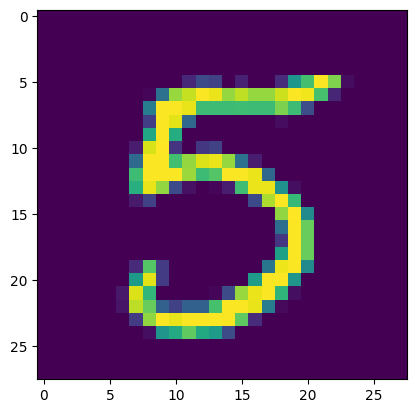

In [8]:
# Lets view any of the pictures
plt.imshow(x_train[0])
plt.show()

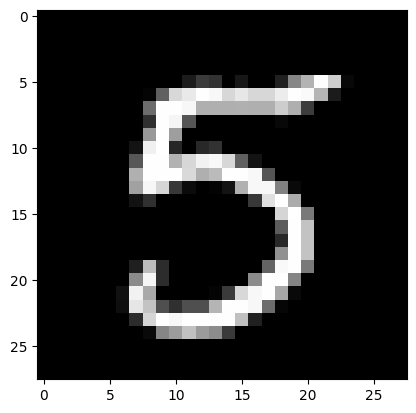

In [9]:
# lets view it in grayscale
plt.imshow(x_train[0], cmap = 'gray')
plt.show()

In [10]:
# Define number of classes
y_train.unique() # the output of this shows that we have 10 classes, so we would define our class to be 10.
num_classes = 10

In [11]:
# convert class vectors to binary class matrices using "keras.utils.to_categorical()" so that we can have categories.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# lets check to be sure that it have categorize correctly
print(y_train.shape)
print(y_test.shape)

(19999, 10)
(9999, 10)


In [13]:
y_train[0] # here we have a 10 by 10 matrix, we can check for [1],[2],[3], ...[10]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [14]:
# Lets NORMALIZE our data

# Lets convert to float32 using the ".astype()" method to improve computational efficiency.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [15]:
# This step is a common preprocessing step for "image data", where pixel values are typically represented as integers in the range of 0 to 255.
# By dividing by 255, the pixel values are normalized to a range of 0 to 1. This is often beneficial for neural networks, as it can improve training stability and convergence.
x_train= x_train / 255
x_test = x_test / 255

In [16]:
# lets view for x_train
x_train[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [17]:
# lets view for x_test
x_test[:5]

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [18]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (19999, 28, 28, 1)
x_test shape: (9999, 28, 28, 1)
19999 train samples
9999 test samples


In [19]:
# Define parameters
batch_size = 128 # Number of  samples proceesed per iteration
num_classes = 10 # Numbers of categories
epochs = 10 # Numbers of iterations
input_shape = (28, 28, 1) # Shape of each image (height, width, channel)

In [20]:
# Define model architecture
model = Sequential()
# This creates a new sequential model. This model is a linear stack of layers, where the output of one layer becomes the input of the next.

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) # 3 by 3 pixel for convolutional kennel
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # to prevent overfitting
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Create model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# compiling our neural network model in Keras
# categorical_crossentropy is a loss function while Adadelta is an optmizer
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [23]:
# Train model
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 434ms/step - accuracy: 0.1069 - loss: 2.3134 - val_accuracy: 0.1684 - val_loss: 2.2759
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 77s 408ms/step - accuracy: 0.1495 - loss: 2.2769 - val_accuracy: 0.2560 - val_loss: 2.2376
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 428ms/step - accuracy: 0.1971 - loss: 2.2395 - val_accuracy: 0.3487 - val_loss: 2.1973
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 415ms/step - accuracy: 0.2497 - loss: 2.2026 - val_accuracy: 0.4347 - val_loss: 2.1542
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 69s 440ms/step - accuracy: 0.3047 - loss: 2.1629 - val_accuracy: 0.5061 - val_loss: 2.1076
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 455ms/step - accuracy: 0.3430 - loss: 2.1248 - val_accuracy: 0.5601 - val_loss: 2.0570
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 430ms/step - accuracy: 0.4013 - loss: 2.0698 - val_accuracy: 0.6295 - val_loss: 2.0013
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 65s 414ms/step - accuracy: 0.4374 - loss: 2

In [24]:
# Save model
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Saving the model as mnist.h5


In [25]:
# Evaluate model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.8034908771514893
Test accuracy: 0.7349734902381897


In [34]:
# %%capture
# !pip install pywin32
# !python -m pywin32_postinstall -install  # Make sure pywin32 is correctly installed.
# import sys
# !{sys.executable} -m pip install pywin32 --force-reinstall # Force reinstall pywin32
# import win32gui

In [27]:
# from keras.models import load_model
# from tkinter import *
# import tkinter as tk
# import win32gui
# from PIL import ImageGrab, Image
# import numpy as np

# model = load_model('mnist.h5')

# def predict_digit(img):
#     #resize image to 28x28 pixels
#     img = img.resize((28,28))
#     #convert rgb to grayscale
#     img = img.convert('L')
#     img = np.array(img)
#     #reshaping to support our model input and normalizing
#     img = img.reshape(1,28,28,1)
#     img = img/255.0
#     #predicting the class
#     res = model.predict([img])[0]
#     return np.argmax(res), max(res)

# class App(tk.Tk):
#     def __init__(self):
#         tk.Tk.__init__(self)

#         self.x = self.y = 0

#         # Creating elements
#         self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
#         self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
#         self.classify_btn = tk.Button(self, text = "Recognise", command =         self.classify_handwriting)
#         self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)

#         # Grid structure
#         self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
#         self.label.grid(row=0, column=1,pady=2, padx=2)
#         self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
#         self.button_clear.grid(row=1, column=0, pady=2)

#         #self.canvas.bind("<Motion>", self.start_pos)
#         self.canvas.bind("<B1-Motion>", self.draw_lines)

#     def clear_all(self):
#         self.canvas.delete("all")

#     def classify_handwriting(self):
#         HWND = self.canvas.winfo_id() # get the handle of the canvas
#         rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
#         im = ImageGrab.grab(rect)

#         digit, acc = predict_digit(im)
#         self.label.configure(text= str(digit)+', '+ str(int(acc*100))+'%')

#     def draw_lines(self, event):
#         self.x = event.x
#         self.y = event.y
#         r=8
#         self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

# app = App()
# mainloop()

In [28]:
# %%capture
# !pip install streamlit opencv-python-headless streamlit-drawable-canvas


In [29]:
# # Trying out streamlit

# import streamlit as st
# import numpy as np
# from keras.models import load_model
# from PIL import Image, ImageOps
# import cv2

# # Load the pre-trained model
# model = load_model('mnist.h5')

# # Function to predict the digit
# def predict_digit(img):
#     # Resize image to 28x28 pixels
#     img = img.resize((28,28))
#     # Convert rgb to grayscale
#     img = img.convert('L')
#     img = np.array(img)
#     # Reshaping to support our model input and normalizing
#     img = img.reshape(1,28,28,1)
#     img = img / 255.0
#     # Predicting the class
#     res = model.predict([img])[0]
#     return np.argmax(res), max(res)

# # Streamlit App Interface
# st.title("Handwritten Digit Recognition")

# st.markdown("### Upload or Draw a Digit")

# # File uploader to upload image
# uploaded_file = st.file_uploader("Choose an image...", type="png")

# if uploaded_file is not None:
#     # Convert the file to an opencv image.
#     image = Image.open(uploaded_file)

#     # Display the uploaded image
#     st.image(image, caption='Uploaded Image.', use_column_width=True)

#     # Predict the digit
#     st.write("Classifying...")
#     digit, acc = predict_digit(image)
#     st.write(f"Predicted Digit: {digit}, Accuracy: {int(acc * 100)}%")

# # Optional: Adding a canvas for drawing (if you want to enable drawing)
# st.markdown("### Draw a Digit")
# stroke_width = st.slider("Stroke Width: ", 1, 25, 9)

# # Create a canvas component
# from streamlit_drawable_canvas import st_canvas

# # Create a canvas for drawing
# canvas_result = st_canvas(
#     stroke_width=stroke_width,
#     stroke_color="#000000",
#     background_color="#FFFFFF",
#     height=300,
#     width=300,
#     drawing_mode="freedraw",
#     key="canvas"
# )

# # If there's drawing on the canvas
# if canvas_result.image_data is not None:
#     # Convert the drawing to an image
#     img = canvas_result.image_data.astype(np.uint8)

#     # Convert the numpy image array to a PIL image
#     img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#     # Predict the digit
#     st.write("Classifying...")
#     digit, acc = predict_digit(img)
#     st.write(f"Predicted Digit: {digit}, Accuracy: {int(acc * 100)}%")



In [35]:
# streamlit run app.py